In [144]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Polygon
import numpy as np
import math
from random import randint

h = 0.6981317007977318


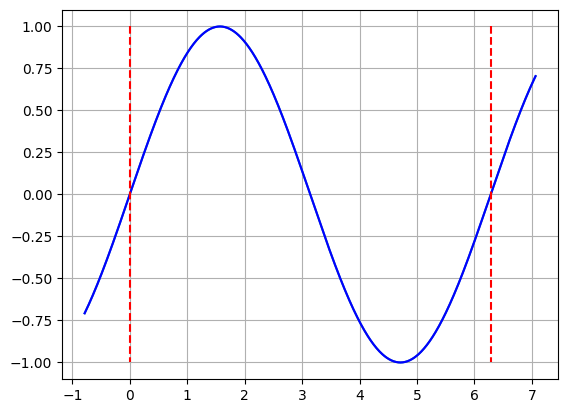

In [145]:

global flag_mi, flag_ma
flag_mi, flag_ma = 0, 0
n = 9 # Количество столбцов

Lgr, Rgr = -0.25*math.pi, 2.25*math.pi # Левая и Правая граница функции
Lit, Rit = 0, 2*math.pi # Левая и Правая границы интегрирования

h = abs((Lit-Rit)/n) # Шаг столбца
print(f'h = {h}') 

def Func(x): #Задаём функцию.
    global F, flag_mi, flag_ma, n, h
    flag_mi, flag_ma = 0, 0

    
    F = math.sin(x)
    if F == math.cos(x):
        flag_mi, flag_ma  = math.pi, 0

    elif F == math.sin(x): 
        flag_mi, flag_ma = 0.5*math.pi, 1.5*math.pi

    elif F == math.cos(2*x): 
        flag_mi, flag_ma = 0.5*math.pi, 0
    elif F == math.sin(2*x): 
        flag_mi, flag_ma = 0.25*math.pi, 0.75*math.pi

    return F
x = np.arange(Lgr, Rgr, 0.01)
plt.plot(x, list(map(Func, x)))
plt.grid(True)
yD = [Func(i) for i in x]
plt.plot(list(x), yD, 'b')
plt.plot([Lit, Lit], [max(yD), min(yD)], '--r') #рисуем границы интегрирования
plt.plot([Rit, Rit], [max(yD), min(yD)], '--r')
plt.show()


-1.3856572123669368


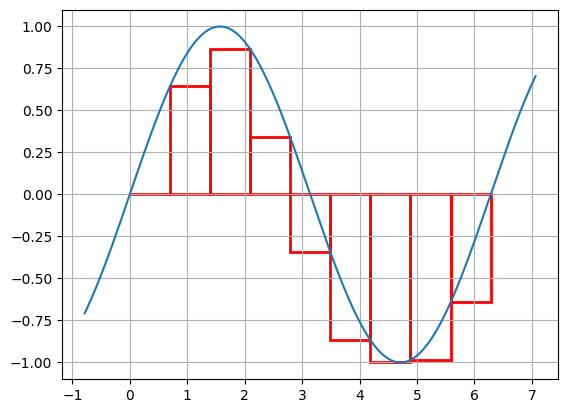

In [146]:
plt.close()
x = np.arange(Lgr, Rgr, 0.01) #Для триганометрии лучше брать маленькие числа
#рисуем нашу функцию
plt.plot(x, list(map(Func, x)))
plt.grid(True)


xN = np.arange(Lit, Rit, h) #Начало и конец промежутка суммы Дарбу

def draw_min(): #Рисуем нижнюю Дарбу
    summa = 0
    xD, yD = [], [] #значения для x и y по Дарбу
    for i in xN:
        if (i<=flag_mi<=i+h):
            heightcurr = min(Func(i),Func(i+h),Func(flag_mi))
        elif (i<=flag_ma<=i+h):
            heightcurr = min(Func(i),Func(i+h),Func(flag_ma))
        else:
            heightcurr = min(Func(i),Func(i+h))
        plt.gca().add_patch(Rectangle((i,0),h,heightcurr,linewidth=2,edgecolor='r',facecolor='none')) #функция рисования прямоугольников
        summa += h*(heightcurr)
    print(summa)

def draw_max(): #Рисуем нижнюю Дарбу
    summa = 0
    xD, yD = [], [] #значения для x и y по Дарбу
    for i in xN:
        if (i<=flag_mi<=i+h):
            heightcurr = max(Func(i),Func(i+h),Func(flag_mi))
        elif (i<=flag_ma<=i+h):
            heightcurr = max(Func(i),Func(i+h),Func(flag_ma))
        else:
            heightcurr = max(Func(i),Func(i+h))
        plt.gca().add_patch(Rectangle((i,0),h,heightcurr,linewidth=2,edgecolor='r',facecolor='none')) #функция рисования прямоугольников
        summa += h*(heightcurr)
    print(summa)

draw_min() # Нарисовать и посчитать нижнюю Дарбу
#draw_max() # Нарисовать и посчитать верхнюю Дарбу
plt.show()

-0.1818822120076195


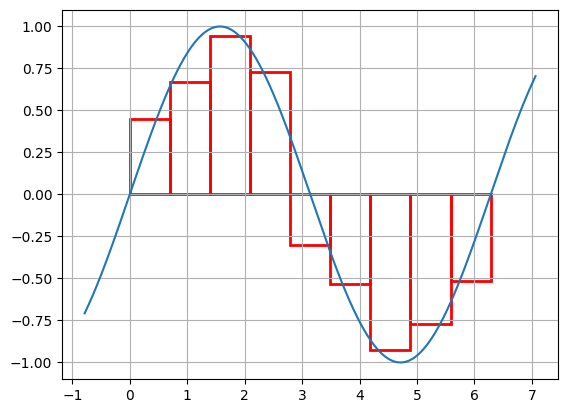

In [147]:
#Всё тоже самое, то теперь делаем задание 1.2 2) Считаем интеграл через случаыйе Эпсилон
plt. close()
x = np.arange(Lgr, Rgr, 0.01) #Для триганометрии лучше брать маленькие числа
#рисуем нашу функцию
plt.plot(x, list(map(Func, x)))
plt.grid(True)

#рисуем столбцы сумм Дарбу
xN = np.arange(Lit, Rit, h) #Начало и конец промежутка суммы Дарбу
def draw(): #Рисуем верхнюю 
    summa = 0
    #print(Mn, Bn)
    xD, yD = [], [] #значения для x и y по Дарбу
    for i in xN:
        Eps = h*randint(0, 1000)/1000
        plt.gca().add_patch(Rectangle((i,0),h,Func(i+Eps),linewidth=2,edgecolor='r',facecolor='none')) #функция рисования прямоугольников
        summa += h*(Func(i+Eps))
    print(summa)
    
draw() # Нарисовать и посчитать со случайным оснащением
plt.show()

0.0


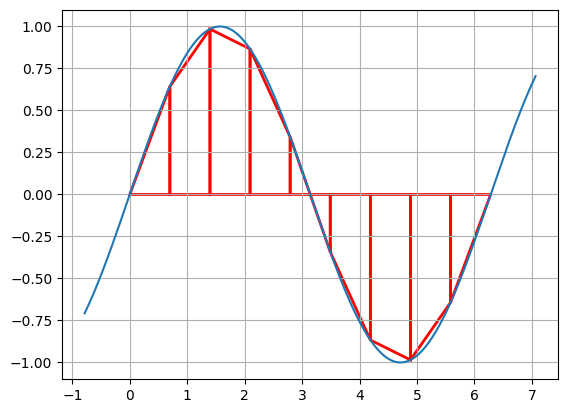

In [148]:
#Всё тоже самое, то теперь делаем задание 1.2 3) Считаем интеграл через метод трапеций
plt. close()
x = np.arange(Lgr, Rgr, 0.01) #Для триганометрии рекомендую брать маленькие числа
#рисуем нашу функцию
plt.plot(x, list(map(Func, x)))
plt.grid(True)

#рисуем столбцы сумм Дарбу
xN = np.arange(Lit, Rit, h) #Начало и конец промежутка суммы Дарбу

def draw(): #Рисуем верхнюю Дарбу
    summa = 0
    for i in xN:
        plt.gca().add_patch(Polygon([(i,0), (i,Func(i)),(i+h,Func(i+h)),(i+h,0)],closed=True,linewidth=2,edgecolor='r',facecolor='none')) #функция рисования трапеции
        summa += (h*((Func(i))+Func(i+h))*(1/2))
    print(summa)
    

draw() # Нарисовать и посчитать со случайным оснащением
plt.show()